In [1]:
import pandas as pd
import numpy as np
import yfinance
import matplotlib.pyplot as plt

In [2]:
prices=yfinance.download(['NVDA', 'TSLA', 'AAPL', 'AVB', 'ORCL', 'AMZN'], start='2020-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  6 of 6 completed


In [3]:
prices

Ticker,AAPL,AMZN,AVB,NVDA,ORCL,TSLA
Date,,,,,,
2020-01-02,72.620834,94.900497,172.700119,5.972162,49.642696,28.684000
2020-01-03,71.914810,93.748497,174.358429,5.876571,49.467865,29.534000
2020-01-06,72.487831,95.143997,174.650070,5.901215,49.725513,30.102667
2020-01-07,72.146957,95.343002,170.850082,5.972658,49.835930,31.270666
2020-01-08,73.307510,94.598503,171.558426,5.983861,50.030018,32.809334
...,...,...,...,...,...,...
2025-05-27,200.210007,206.020004,201.460007,135.500000,161.910004,362.890015
2025-05-28,200.419998,204.720001,201.979996,134.809998,163.850006,356.899994
2025-05-29,199.949997,205.699997,206.020004,139.190002,162.899994,358.429993


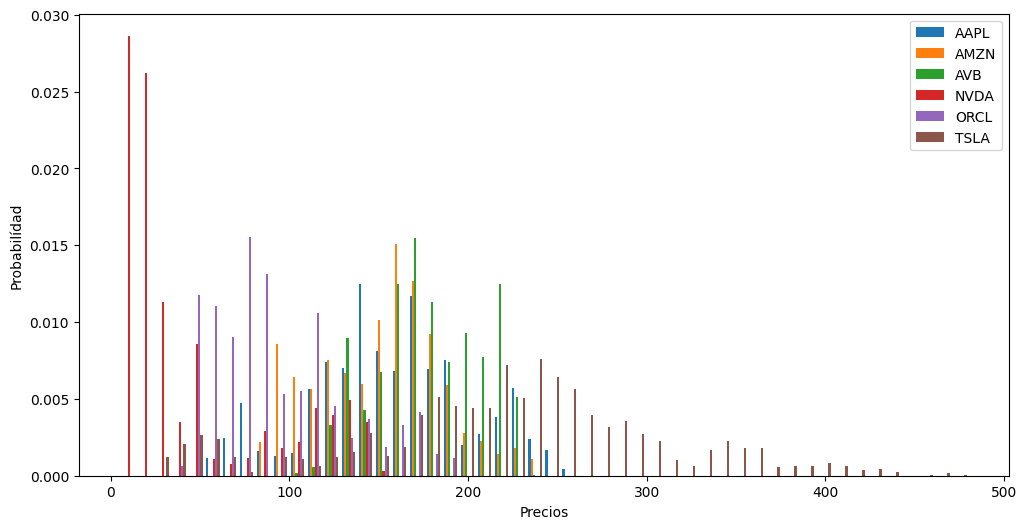

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(prices, label=prices.columns, density=True, bins=50)
plt.xlabel('Precios')
plt.ylabel('Probabilídad')
plt.legend()
plt.show();

In [5]:
daily_returns=(prices/prices.shift()-1).dropna()
daily_returns.head()

Ticker,AAPL,AMZN,AVB,NVDA,ORCL,TSLA
Date,,,,,,
2020-01-03,-0.009722,-0.012139,0.009602,-0.016006,-0.003522,0.029633
2020-01-06,0.007968,0.014886,0.001673,0.004194,0.005208,0.019255
2020-01-07,-0.004702,0.002092,-0.021758,0.012106,0.002221,0.038801
2020-01-08,0.016086,-0.007809,0.004146,0.001876,0.003895,0.049205
2020-01-09,0.021241,0.004799,0.002332,0.010983,0.004619,-0.021945


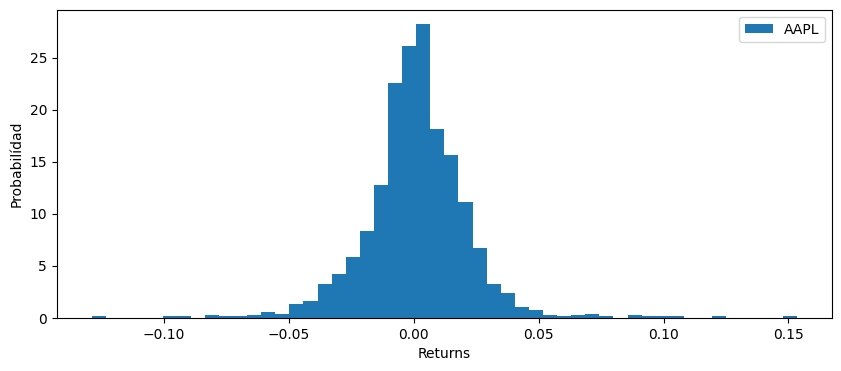

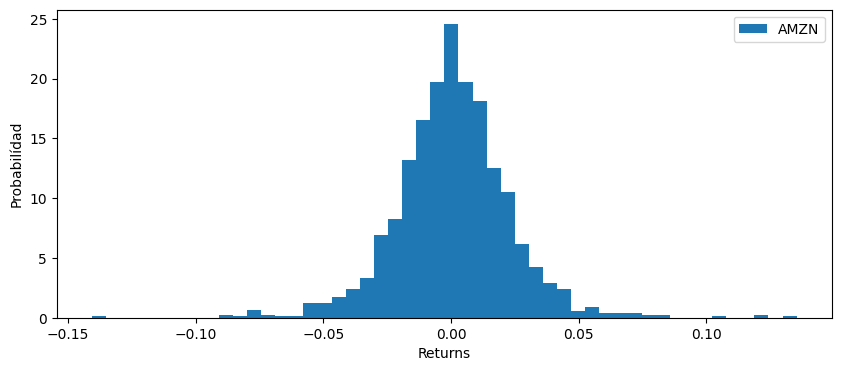

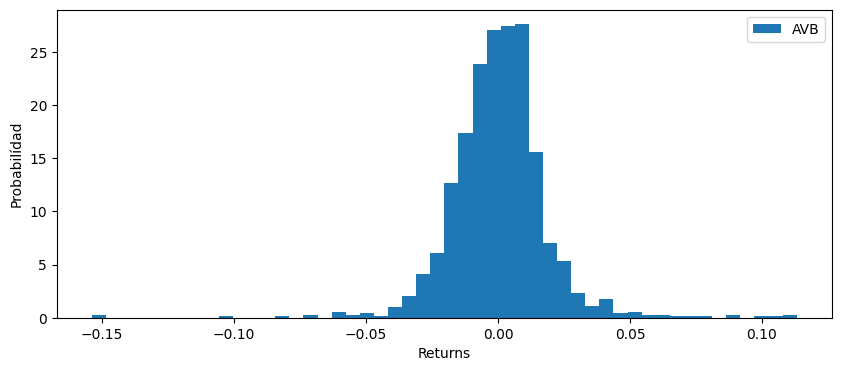

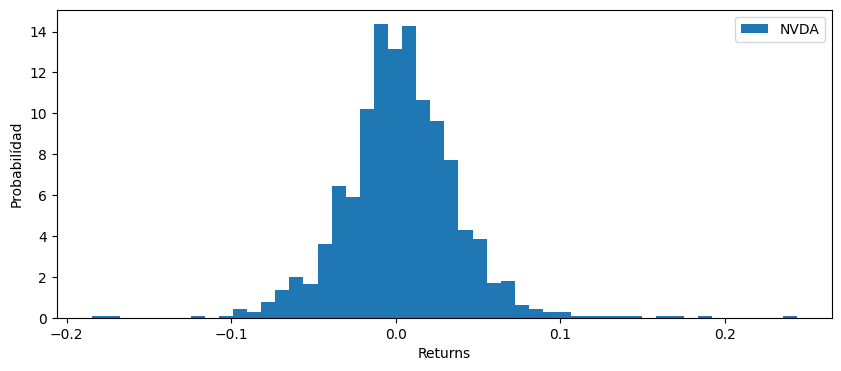

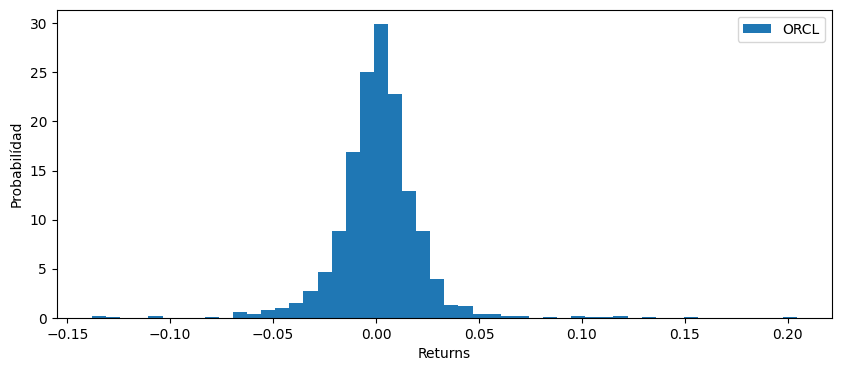

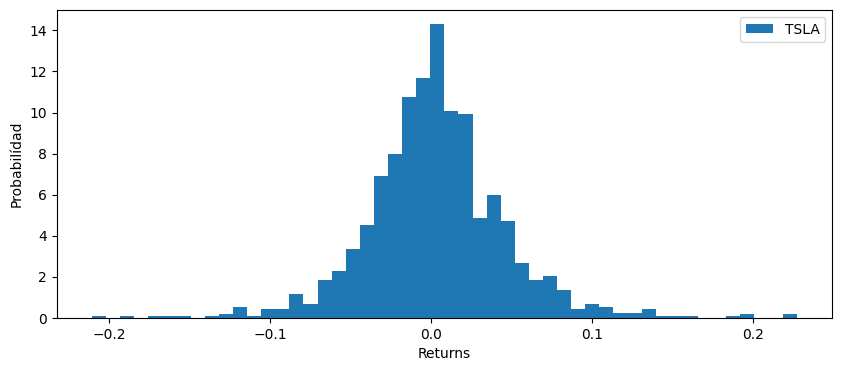

In [6]:
for stock in daily_returns.columns:
    
    plt.figure(figsize=(10, 4))
    plt.hist(daily_returns[stock], label=stock, density=True, bins=50)
    plt.xlabel('Returns')
    plt.ylabel('Probabilídad')
    plt.legend()
    plt.show();

El coeficiente de variación, se calcula de la siguiente manera:

$$CV = \frac{\sigma}{\mu}$$

- Entre menor sea el coeficiente de variación es mejor. 

In [7]:
df=pd.DataFrame(columns=daily_returns.columns).T
df['Daily_Ret']=daily_returns.mean()
df['Anual_Ret']=daily_returns.mean()*252
df['Daily_Vol']=daily_returns.std()
df['Anual_Vol']=daily_returns.std()*np.sqrt(252)
df['Coefficent of Variation']=df['Anual_Vol']/df['Anual_Ret']
df['Skewness'] = daily_returns.skew()

df

,Daily_Ret,Anual_Ret,Daily_Vol,Anual_Vol,Coefficent of Variation,Skewness
Ticker,,,,,,
AAPL,0.000961,0.242235,0.020648,0.327777,1.353136,0.276311
AMZN,0.000828,0.208687,0.022879,0.363189,1.740349,0.140554
AVB,0.000309,0.077858,0.018744,0.297545,3.821654,-0.245406
NVDA,0.002894,0.729255,0.034663,0.550265,0.754557,0.351063
ORCL,0.001122,0.282660,0.021780,0.345743,1.223179,0.742639
TSLA,0.002749,0.692631,0.042878,0.680662,0.982719,0.276287


In [8]:
w=np.ones(6)/6
w

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [9]:
Rend_port= sum(df['Anual_Ret']*w)
Rend_port*100

37.22211528994593

In [10]:
cov=daily_returns.cov()
cov

Ticker,AAPL,AMZN,AVB,NVDA,ORCL,TSLA
Ticker,,,,,,
AAPL,0.000426,0.000286,0.000164,0.000426,0.000213,0.000444
AMZN,0.000286,0.000523,0.000116,0.000470,0.000210,0.000452
AVB,0.000164,0.000116,0.000351,0.000172,0.000141,0.000214
NVDA,0.000426,0.000470,0.000172,0.001202,0.000374,0.000722
ORCL,0.000213,0.000210,0.000141,0.000374,0.000474,0.000262
TSLA,0.000444,0.000452,0.000214,0.000722,0.000262,0.001838


In [11]:
Var_port = (w.T @ cov @ w)*252
Volat_port = np.sqrt(Var_port)

Var_port*100, Volat_port*100

(9.902704849763053, 31.46856343998412)

In [12]:
sum(df['Anual_Vol']*w)*100

42.75303236806184

## Actividad en clase: Portafolios de Inversion

## QQQ

Es un ETF (fondo cotizado) que busca replicar que el NASDAQ 100, es un índica que contiene las 100 empresas con mayor Market Cap (Precio Accion * No. Acciones). Se enfoca en empresas de tecnologia principalmente de USA. 


## IWO

Es un ETF (fondo cotizado) que busca replicar los resultados de inversion de baja capitalización en crecimiento de Estados Unidos. 


## VXX

Es un ETN (exchange traded note) refleja el rendimiento en futuros a corto plazo del S&P 500. 

## MTUM 

Es un ETF (fondo cotizado) que busca replicar los resultados de las empresas de mid y high cap. 

In [15]:
prices=yfinance.download(['QQQ', 'IWO', 'VXX', 'MTUM'], start='2020-01-01')['Close']

prices.head()

[*********************100%***********************]  4 of 4 completed


Ticker,IWO,MTUM,QQQ,VXX
Date,,,,
2020-01-02,207.340530,118.660217,209.325851,928.640015
2020-01-03,206.306549,118.641380,207.408463,978.559998
2020-01-06,207.040985,118.773232,208.744888,965.119995
2020-01-07,206.673752,118.481247,208.715805,960.640015
2020-01-08,207.900955,119.112320,210.284576,947.200012


In [20]:
w=np.array([.268, .327, .266, .139])

In [18]:
rets=prices.pct_change().dropna()

rets.head()

Ticker,IWO,MTUM,QQQ,VXX
Date,,,,
2020-01-03,-0.004987,-0.000159,-0.009160,0.053756
2020-01-06,0.003560,0.001111,0.006443,-0.013734
2020-01-07,-0.001774,-0.002458,-0.000139,-0.004642
2020-01-08,0.005938,0.005326,0.007516,-0.013991
2020-01-09,0.003625,0.008699,0.008474,-0.041892


In [24]:
mean=rets.mean()

Rend_port_diario = (mean * w).sum()
Rend_port_anual = Rend_port_diario * 252

print('El rendimiento del portafolio anual es de', Rend_port_anual*100, '%')

El rendimiento del portafolio anual es de 9.584410865534105 %


In [26]:
cov=rets.cov()

var_port_diario = w.T @ cov @ w
var_port_anual = var_port_diario *252

print('La varianza del portafolio anual es de', var_port_anual*100, '%')

La varianza del portafolio anual es de 2.3700170654920907 %


In [27]:
vol_port_anual = np.sqrt(var_port_anual)

print('La volatilidad del portafolio anual es de', vol_port_anual*100, '%')

La volatilidad del portafolio anual es de 15.394859744382508 %


In [33]:
np.sqrt((rets.var() * w).sum() * 252)*100

37.87254768957486

In [28]:
rets.corr()

Ticker,IWO,MTUM,QQQ,VXX
Ticker,,,,
IWO,1.000000,0.817946,0.821392,-0.701548
MTUM,0.817946,1.000000,0.892152,-0.685832
QQQ,0.821392,0.892152,1.000000,-0.692496
VXX,-0.701548,-0.685832,-0.692496,1.000000


### Estrategias de Inversión

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
prices=yf.download(['^GSPC', 'ACWI','^DJI', 'IYF', 'XLY', 'XLP', '^NBI', 'GSG', 'BND', 'IHE'], 
                   start='2020-01-01', end='2025-06-02')['Close']
prices

[*********************100%***********************]  10 of 10 completed


Ticker,ACWI,BND,GSG,IHE,IYF,XLP,XLY,^DJI,^GSPC,^NBI
Date,,,,,,,,,,
2020-01-02,73.371567,72.023148,16.290001,49.126125,63.359642,54.455322,121.261276,28868.800781,3257.850098,3763.050049
2020-01-03,72.739288,72.280426,16.510000,48.599960,63.002903,54.368172,120.229362,28634.880859,3234.850098,3715.300049
2020-01-06,72.904221,72.194710,16.510000,48.658081,62.966305,54.481472,120.563789,28703.380859,3246.280029,3743.429932
2020-01-07,72.720970,72.134628,16.459999,48.526539,62.540947,54.063114,120.372688,28583.679688,3237.179932,3745.149902
2020-01-08,73.078339,72.023148,16.150000,48.431709,62.925140,54.263588,120.735764,28745.089844,3253.050049,3778.810059
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,122.300003,71.951920,21.559999,63.599998,114.400002,81.599998,210.649994,41603.070312,5802.819824,4084.750000
2025-05-27,124.349998,72.290794,21.410000,64.370003,116.430000,82.339996,216.869995,42343.648438,5921.540039,4122.620117
2025-05-28,123.459999,72.131325,21.330000,63.990002,115.459999,81.779999,214.880005,42098.699219,5888.549805,4086.219971


In [10]:
returns=prices.pct_change().dropna()

returns

Ticker,ACWI,BND,GSG,IHE,IYF,XLP,XLY,^DJI,^GSPC,^NBI
Date,,,,,,,,,,
2020-01-03,-0.008617,0.003572,0.013505,-0.010710,-0.005630,-0.001600,-0.008510,-0.008103,-0.007060,-0.012689
2020-01-06,0.002267,-0.001186,0.000000,0.001196,-0.000581,0.002084,0.002782,0.002392,0.003533,0.007571
2020-01-07,-0.002514,-0.000832,-0.003029,-0.002703,-0.006755,-0.007679,-0.001585,-0.004170,-0.002803,0.000459
2020-01-08,0.004914,-0.001545,-0.018834,-0.001954,0.006143,0.003708,0.003016,0.005647,0.004902,0.008988
2020-01-09,0.005643,0.001191,-0.007430,0.004674,0.006542,0.007067,0.005302,0.007369,0.006655,0.005541
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,-0.003097,0.001526,0.007948,0.001733,-0.001658,0.003690,-0.008986,-0.006116,-0.006708,0.000747
2025-05-27,0.016762,0.004710,-0.006957,0.012107,0.017745,0.009069,0.029528,0.017801,0.020459,0.009271
2025-05-28,-0.007157,-0.002206,-0.003737,-0.005903,-0.008331,-0.006801,-0.009176,-0.005785,-0.005571,-0.008829


In [15]:
rf=4.04

In [20]:
df=pd.DataFrame(columns=returns.columns).T
df['Rend_Prom_Anual_%']=returns.mean()*252*100
df['Vol_Prom_Anual_%']=np.sqrt(252)*returns.std()*100
df['Sharpe Ratio']=(df['Rend_Prom_Anual_%'] - rf)/df['Vol_Prom_Anual_%']
df['Risk Aversion']=(df['Rend_Prom_Anual_%'] - rf)/(0.5 * df['Vol_Prom_Anual_%']**2)

df.sort_values(by='Risk Aversion', ascending=False)

,Rend_Prom_Anual_%,Vol_Prom_Anual_%,Sharpe Ratio,Risk Aversion
Ticker,,,,
^GSPC,13.424816,21.753694,0.431413,0.039663
ACWI,11.755716,20.324036,0.379635,0.037358
XLP,9.216736,16.951449,0.305386,0.036031
IYF,14.471681,25.434307,0.410142,0.032251
XLY,14.051933,26.536499,0.377289,0.028435
^DJI,9.272181,20.932028,0.249961,0.023883
IHE,7.016617,18.953367,0.157049,0.016572
GSG,7.890947,24.487833,0.157260,0.012844
^NBI,4.639452,25.059708,0.023921,0.001909


In [2]:
tickers=['ABT', 'ACN', 'ADM', 'ADSK', 'AES', 'AAPL', 'AFL', 'AIZ', 'AKAM', 'ALL', 'AMD', 'AMGN',
         'AMT', 'AMZN', 'APA', 'APH', 'AZO', 'BAC', 'BAX', 'BBY', 'BLK', 'BSX', 'BTU', 'CAG',
         'CCL', 'CHRW', 'CI', 'CINF', 'COF', 'CPB', 'CRM', 'CTAS', 'CTSH', 'CVS', 'CVX', 'DGX',
         'DHI', 'DIS', 'DTE', 'DV', 'EA', 'ED', 'EMN', 'EMR', 'EQR', 'ETR', 'F', 'FAST', 'FCX',
         'FE', 'FHN', 'FIS', 'FLR', 'FLS', 'GME', 'GOOG', 'GWW', 'HAS', 'HBAN', 'HIG', 'HOG', 'HON',
         'HRB', 'HSY', 'HUM', 'IFF', 'IGT', 'INTU', 'IR', 'JCI', 'K', 'KEY', 'KIM', 'KLAC', 'KO', 'KR',
         'KSS', 'LEN', 'LLY', 'LNC', 'M', 'MA', 'MCD', 'MCK', 'MET', 'MMC', 'MS', 'MSFT', 'MU', 'NBR', 'NDAQ',
         'NEM', 'NVDA', 'NWL', 'PCG', 'PEG', 'PFG', 'PLD', 'PPG', 'PSA', 'PX', 'RL', 'ROST', 'RRC',
         'RSG', 'S', 'SBUX', 'SEE', 'SO', 'SPG', 'STI', 'STT', 'STX', 'SUN', 'SWK', 'SYK', 'SYY', 
         'TAP', 'TMO', 'URBN', 'VLO', 'VZ', 'WAT', 'WDC', 'WEC', 'WHR', 'WU', 'XOM', 'XRAY', 'XRX', 'JPM']

In [3]:
prices=yfinance.download(tickers, start='2021-01-01')['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  131 of 131 completed


In [7]:
returns=prices.pct_change().dropna()

/var/folders/8f/_w_76jq92z567k3ss2yjkcfm0000gn/T/ipykernel_6286/3097450443.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns=prices.pct_change().dropna()


In [8]:
df=pd.DataFrame(columns=returns.columns).T
df['Daily_Ret']=returns.mean()
df['Anual_Ret']=returns.mean()*252
df['Daily_Vol']=returns.std()
df['Anual_Vol']=returns.std()*np.sqrt(252)
df['Coefficent of Variation']=df['Anual_Vol']/df['Anual_Ret']
df['Skewness'] = returns.skew()

df

,Daily_Ret,Anual_Ret,Daily_Vol,Anual_Vol,Coefficent of Variation,Skewness
Ticker,,,,,,
AAPL,0.000493,0.124114,0.018595,0.295185,2.378337,0.538757
ABT,0.000379,0.095436,0.013556,0.215201,2.254923,0.166696
ACN,0.000262,0.065911,0.016868,0.267768,4.062577,-0.080699
ADM,-0.000494,-0.124403,0.018807,0.298544,-2.399808,-3.174830
ADSK,0.000793,0.199713,0.021723,0.344843,1.726692,0.194938
...,...,...,...,...,...,...
WHR,-0.000558,-0.140546,0.024814,0.393912,-2.802719,-0.105528
WU,-0.000368,-0.092721,0.017146,0.272181,-2.935473,-0.095345
XOM,0.000509,0.128294,0.016736,0.265670,2.070801,-0.258357


In [10]:
sorted_df=df.sort_values(by='Coefficent of Variation')

In [14]:
sorted_df[sorted_df['Coefficent of Variation']>0].head(10)

,Daily_Ret,Anual_Ret,Daily_Vol,Anual_Vol,Coefficent of Variation,Skewness
Ticker,,,,,,
BSX,0.001290,0.324964,0.013761,0.218452,0.672236,-0.245695
NVDA,0.003118,0.785800,0.035094,0.557099,0.708958,0.577265
RSG,0.000972,0.244916,0.011167,0.177277,0.723826,-0.256053
MCK,0.001225,0.308594,0.014802,0.234980,0.761454,-0.521412
CTAS,0.001209,0.304603,0.014673,0.232924,0.764679,-0.268563
JPM,0.001248,0.314591,0.015821,0.251144,0.798317,0.342288
APH,0.001378,0.347168,0.018028,0.286184,0.824338,-0.396079
GWW,0.001195,0.301101,0.015803,0.250868,0.833171,0.989560
LLY,0.001419,0.357678,0.020139,0.319690,0.893792,0.701790


In [2]:
import pandas as pd
import numpy as np

In [6]:
df=pd.DataFrame(index=[2020, 2021, 2022, 2023])
df['Fondo_A']=[.22, -.12, .11, -.05]
df['Fondo_B']=[.05, .06, .03, .06]

df

,Fondo_A,Fondo_B
2020,0.22,0.05
2021,-0.12,0.06
2022,0.11,0.03
2023,-0.05,0.06


In [12]:
# Media Aritmética
media_a = df.mean()
media_a*100

Fondo_A    4.0
Fondo_B    5.0
dtype: float64

In [13]:
media_g=((df + 1).prod())**(1/len(df))-1
media_g*100

Fondo_A    3.150722
Fondo_B    4.992811
dtype: float64

In [19]:
media_arm=len(df)/(1/(1 + df)).sum()-1
media_arm*100

Fondo_A    2.313088
Fondo_B    4.985576
dtype: float64

# Rendimiento y Riesgo Esperado

In [21]:
df=pd.DataFrame(index=['Bearish', 'Neutral', 'Bullish'])
df['Prob']=[.25, .30, .45]
df['Rend']=[-.1, .05, .2]

df

,Prob,Rend
Bearish,0.25,-0.10
Neutral,0.30,0.05
Bullish,0.45,0.20


In [24]:
# Valor Esperado (E[R])
E_r=(df['Prob']*df['Rend']).sum()

E_r*100

8.000000000000002

In [29]:
V_r= (df['Prob'] * (df['Rend'] - E_r)**2).sum()
V_r*100

1.485

In [31]:
Vol_ = np.sqrt(V_r)

Vol_*100

12.18605760695394

## Ejercicio 2

In [32]:
df=pd.DataFrame(index=['Dovish', 'Neutral', 'Hawkish'])
df['Prob']=[.7, .2, .1]
df['Tasas']=[.02, .03, .055]

df

,Prob,Tasas
Dovish,0.7,0.020
Neutral,0.2,0.030
Hawkish,0.1,0.055


In [34]:
# Valor Esperado (E[R])
E_r=(df['Prob']*df['Tasas']).sum()

E_r*100

2.55

In [35]:
V_r= (df['Prob'] * (df['Tasas'] - E_r)**2).sum()

V_r*100

0.011224999999999999

In [36]:
Vol_ = np.sqrt(V_r)

Vol_*100

1.0594810050208545